In [1]:
import pandas as pd
import numpy as np
import matplotlib 

In [3]:
data=pd.read_csv("payment_fraud.csv")

In [5]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [7]:
data.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [9]:
data['Category']

0           shopping
1        electronics
2               food
3        electronics
4           shopping
            ...     
39216       shopping
39217       shopping
39218       shopping
39219       shopping
39220       shopping
Name: Category, Length: 39221, dtype: object

In [11]:
data.fillna({ 'isWeekend': data['isWeekend'].mode()[0],
    'Category': data['Category'].mode()[0]
}, inplace=True)


In [15]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [17]:
data.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

In [19]:
data = data.drop(['numItems', 'localTime'], axis=1)

In [21]:
data = pd.get_dummies(data, columns=['paymentMethod', 'Category'],drop_first=True)


In [23]:
data

,accountAgeDays,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,28.204861,0.0,0,True,False,False,True
1,725,0.000000,0.0,0,False,True,False,False
2,845,0.000000,1.0,0,False,False,True,False
3,503,0.000000,1.0,0,False,False,False,False
4,2000,0.000000,0.0,0,False,False,False,True
...,...,...,...,...,...,...,...,...
39216,986,0.000000,0.0,0,False,False,False,True
39217,1647,377.930556,0.0,0,False,False,False,True
39218,1591,0.000000,1.0,0,False,False,False,True
39219,237,236.082639,1.0,0,False,False,False,True


In [25]:
x = data.drop('label', axis=1)
y = data['label']

In [27]:
print(data['label'].value_counts())

label
0    38661
1      560
Name: count, dtype: int64


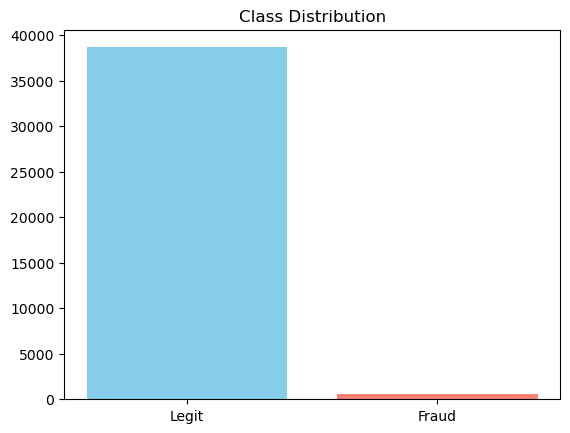

In [29]:
import matplotlib.pyplot as plt
plt.bar(y.value_counts().index, y.value_counts().values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Class Distribution")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_res_scaled, y_train_res)

LogisticRegression(max_iter=2000, random_state=42)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7077  656]
 [   0  112]]
0.9163798597833015
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7733
           1       0.15      1.00      0.25       112

    accuracy                           0.92      7845
   macro avg       0.57      0.96      0.61      7845
weighted avg       0.99      0.92      0.95      7845



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
[[7733    0]
 [   0  112]]
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7733
           1       1.00      1.00      1.00       112

    accuracy                           1.00      7845
   macro avg       1.00      1.00      1.00      7845
weighted avg       1.00      1.00      1.00      7845



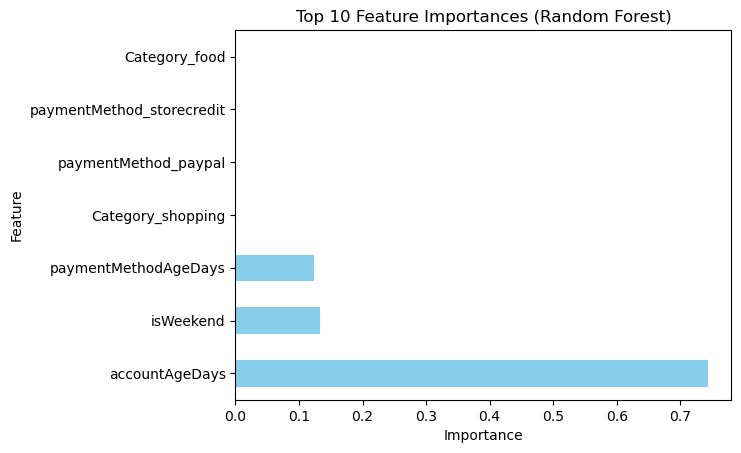

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

feat_imp = pd.Series(rf.feature_importances_, index=x.columns)
feat_imp.sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()